# Computer Vision - P3

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **English**.

- The deliverable of both parts must be a file named **P3_Student1_Student2.zip** that includes:
    - The notebook P3_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): November 1st, 23:00 h** 

==============================================================================================
## Practicum 3: Image and Video Segmentation

==============================================================================================

The main topics of Laboratory 3 are:

3.1. Segmentation of video shots with static scenes.

3.2. Background subtraction.

3.3. Segmentation of images.

The following chapters of the book “Computer Vision: Algorithms and Applicatons” from Richard Szeliski have further information about the topic:

* Chapter 4: Computer Vision: Algorithms and Applications.

* Chapter 5: Segmentation.



## Video segmentation

Given the video stored in ‘Barcelona-sequence’, which contains images acquired by a static camera, we ask you to:
- Find the temporal segments of the video (shots). Where the scene change? (Section 3.1)
- Extract the background images and thus, remove all the "artifacts" considered as foreground related to movement. (Section 3.2)




<img src="images/screenshot.png" width=600>

## 3.1 Segmentation of video shots

Read and visualize the sequence of images "images/Barcelona-sequence".

**Hint:** In order to read a collection of images, we wil use the function [animation.FuncAnimation](https://matplotlib.org/2.0.0/api/_as_gen/matplotlib.animation.FuncAnimation.html). Observe in the following Example, how FuncAnimation is used to read and visualize a sequence of frames. Explore the parameters of animation.FuncAnimation().

In [23]:
# Here we will put all the libraries necessary for the practice
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from skimage import img_as_float
from skimage.exposure import histogram
from skimage.segmentation import felzenszwalb, slic, quickshift
from skimage.segmentation import mark_boundaries

In [3]:
# Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

In [4]:
# Reading a sequence of images from a folder
ic = io.ImageCollection('images/Barcelona-sequence/*.png')

<IPython.core.display.Javascript object>


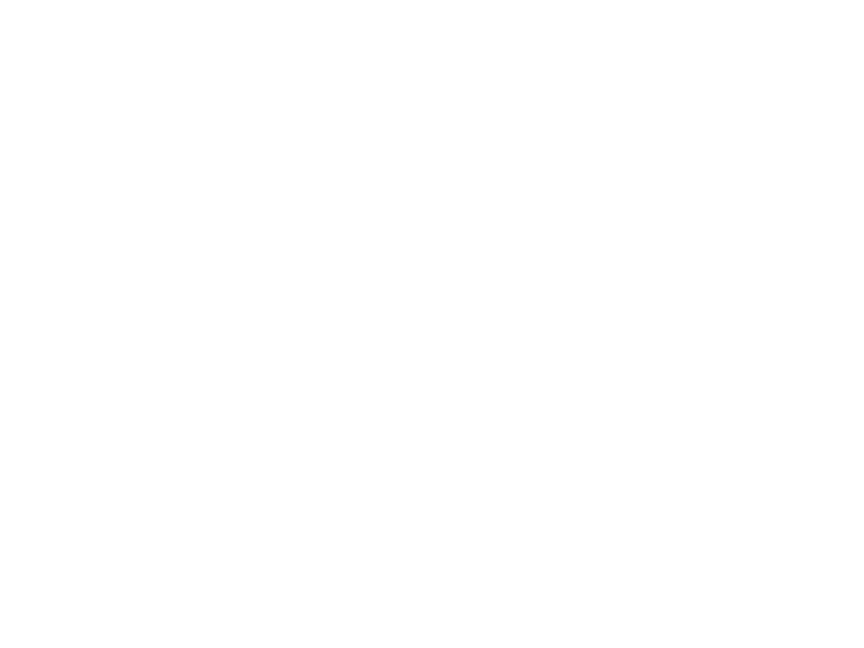

In [5]:
fig = plt.figure()  # Create figure
im = plt.imshow(ic[0], animated=True) #Visualize the first image

def run(i):   #Updating the frame visualization
    im.set_array(ic[i]) #Changing the content of the canvas
    return im, #to return a tuple!

plt.show()
ani = animation.FuncAnimation(fig, run, interval=1, blit=True, frames=len(ic), repeat= False)
plt.show()

a) Find where a shot (scene) finishes and the following starts (the shot boundaries). To achieve this goal, we are going to compute the difference between the histograms of consecutive frames. The proposed solution required:

- Compute the histogram for each RGB channel

- The 'total' histogram of the image is computed as the sum of the three histograms

- Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames

Those differences with largest values corresponds to the transitions between shots. 

Therefore, **we need to create a funtion which return an array with the differences between histograms. We will plot the resulting array in order to localice the maximum values as well as a suitable threshold to define localize the transitions.**

<img src="images/histogramshot.png" width=600>
<img src="images/difference_histograms.png">

To solve this exercise, you need to create a **temporal plot** showing a frame by frame difference measure to be defined by you, being applicable to distinguish the shots. Define a criterion to detect the boundaries of the shots and visualize it in a static plot.

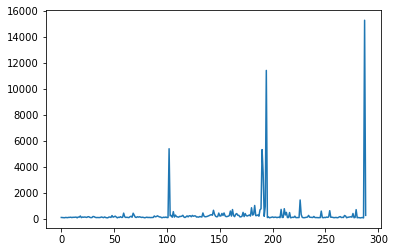

In [6]:
# Make plots appear and store within the notebook
%matplotlib inline

def compute_dif_hist(im, im_prev, hist_im_prev=None):
    """
    Function that create a temporal plot of the differences between frame and frame
    Parameters:
        im: current image
        im_prev: previous image
        hist_im_prev: ndarray histogram of the previous image 
    Return:
        hist_diff : value of the difference
        hist_im_prev: ndarray histogram of the previous frame 
    """
    # Compute the histogram for each RGB channel considering that the type of the image is uint8
    [hist_r, bins_r]=histogram((img_as_float(im)[:,:,0]),64)
    [hist_g, bins_g]=histogram((img_as_float(im)[:,:,1]),64)
    [hist_b, bins_b]=histogram((img_as_float(im)[:,:,2]),64)

    # The 'total' histogram of the image is computed as the sum of the three histograms
    hist_im = np.array(hist_r+hist_g+hist_b)
    
    # We will use this histogram for the next iteration, in this way we save calculations
    if hist_im_prev is None:
        [hist_r, bins_r]=histogram((img_as_float(im_prev)[:,:,0]),64)
        [hist_g, bins_g]=histogram((img_as_float(im_prev)[:,:,1]),64)
        [hist_b, bins_b]=histogram((img_as_float(im_prev)[:,:,2]),64)
        hist_im_prev = np.array(hist_r+hist_g+hist_b)
   
    # Compute the mean of the difference (in absolute value) between the histograms of two consecutive frames
    hist_diff = np.mean(np.abs(hist_im_prev - hist_im))
    
    return hist_diff, hist_im

def get_data():
    # Initialize the data arrays 
    xdata = []
    ydata = []
    # Initially the hist value of the prev is None
    prev_hist = None
    
    # Iterate through all the frames in our collection
    for t in range(len(ic)-1):
        # Update the data plot
        y, prev_hist = compute_dif_hist(ic[t+1], ic[t], prev_hist)
        # Frame index
        xdata.append(t) 
        # Value of difference between 2 frames
        ydata.append(y) 

    return [xdata,ydata]

data = get_data()
fig, ax = plt.subplots(1)
plt.plot(data[0], data[1])

b) Additionally, create an interactive plot executing the following code in "Example A". Substitute the bottom plot with the temporal plot showing the differences between the consecutive frames. 

In [7]:
# Example A
def data_gen():
    y = 0  ## Value of interest
    t = 0  ## Temporal value
    while True:
        t += 0.05
        y += 0.1
        yield t, y
        
def data_generator():
    """
    Generator whereby the data are calculated only when requested, in this way we save space
    """
    y_data = get_data()[1]
    t = 0
    for y in y_data:
        t += 1
        yield t, y

<IPython.core.display.Javascript object>


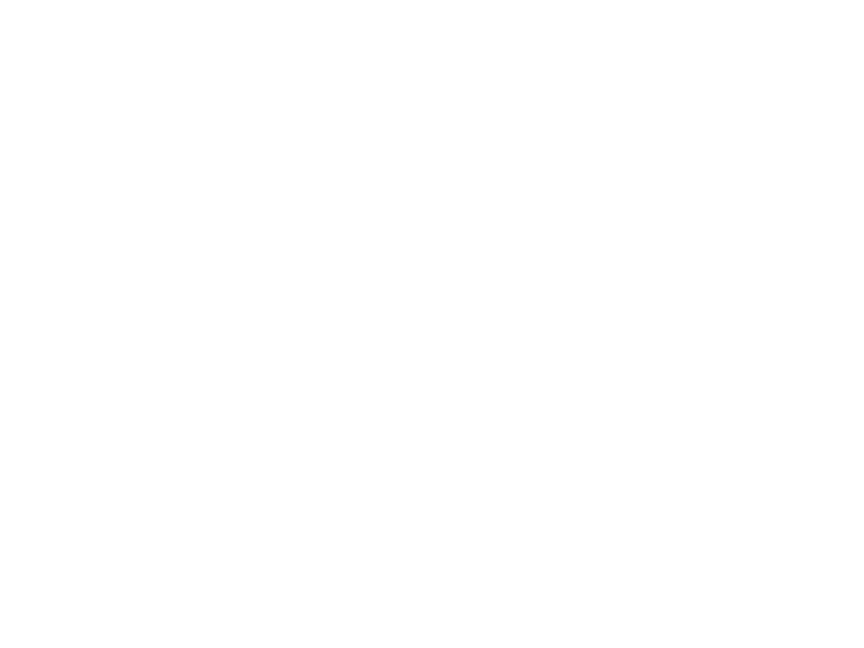

C:\Users\witek\anaconda3\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [8]:
# Changing the pluggin is necessary always when visualizing a video!
%matplotlib nbagg  

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)

# Intialize a line object on the second axes for plotting
line, = ax2.plot([], [], lw=2, color='r')

ax2.set_ylim(0, 1.1)
ax2.set_xlim(0, 5)
ax2.grid()

# Initialize the data arrays 
xdata, ydata = [], []

def run(data):
    # Update the data plot
    t, y = data
    xdata.append(t) # time = x axis
    ydata.append(y) # y axis

    # Plot image on top row
    ax1.imshow(ic[len(xdata)])
          
    # Plot sin in bottom row
    xmin, xmax = ax2.get_xlim()
    ymin, ymax = ax2.get_ylim()
    
    if t >= xmax:
        ax2.set_xlim(xmin, 2*xmax)
        ax2.figure.canvas.draw()
    
    if y >= ymax:
        ax2.set_ylim(ymin,2*ymax)
        ax2.figure.canvas.draw()
            
    # Update the data of both line objects
    line.set_data(xdata, ydata)

    return line

ani = animation.FuncAnimation(fig, run, data_generator, blit=True, interval=1, repeat=False)
plt.show()

c) Show the initial and final images of each shot extracted as follows:

<img src="images_for_notebook/result_shot_detection.png">


Use the previous plot to define the proper threshold value over the differences of histograms. Use the threshold to localize indexes of the array returned by the function proposed in the previous question and, therefore, localize the initial and final frames for each shot.


In [9]:
y_data = get_data()[1]

In [26]:
def plot_images(images,titles,ncols,video_seg = True):
    """
    Function that shows the images on the same canvas with their corresponding titles
        images: list of images we want to plot together
        titles: list of corresponding titles of the images
        ncols: number of columns
    """
    
    nrows = len(images)//ncols
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,figsize=(15,15))
    
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axs[i,j]
            if video_seg:
                ax.imshow(ic[images[index]])
            else:
                ax.imshow(images[index])
            ax.axis('off')
            ax.set_title(titles[index])
            index += 1
    plt.show()

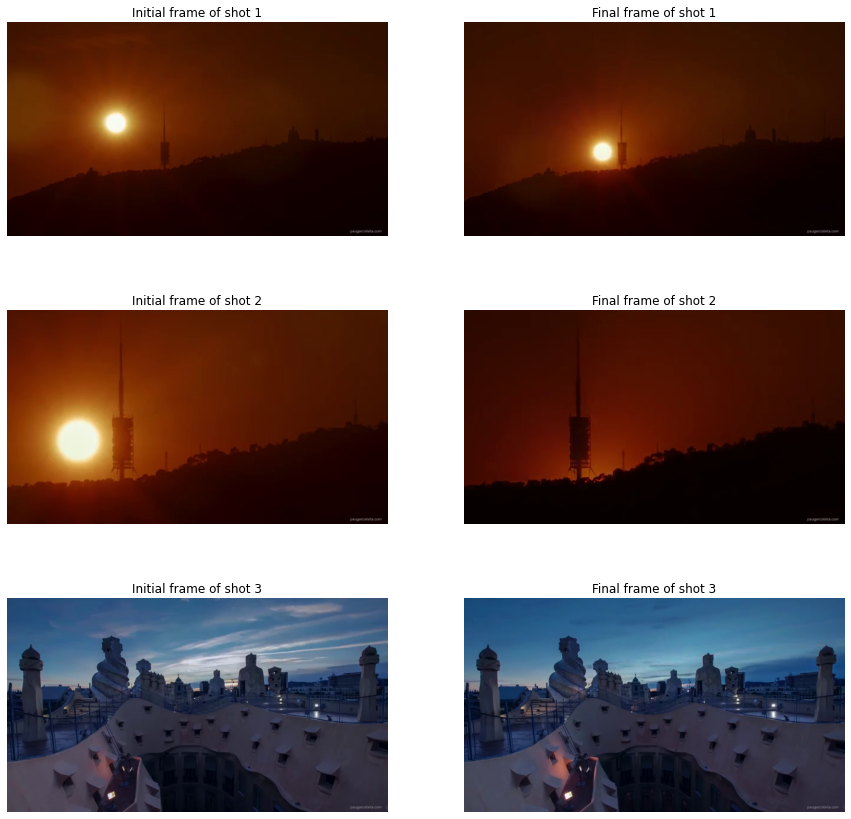

In [11]:
# Make plots appear and store within the notebook
%matplotlib inline

def plot_ini_fin(y_data, nShots):
    """
    Function that plot the initial and final scenes of different shots we have
        y_data: list of means of the difference (in absolute value) between the histograms of two consecutive frames
        nShots: number of shots we have
    """
    # We get the indices of the peaks in the graph and sort them
    final = np.argsort(y_data)[-nShots:]
    final.sort()

    # And get the indices where the scenes start
    initial = []
    last = -1
    for i in final:
        initial.append(last+1)
        last = i
    
    images = [*initial,*final]
    images.sort()
    titles = ['Initial frame of shot 1','Final frame of shot 1', 'Initial frame of shot 2', 'Final frame of shot 2',
             'Initial frame of shot 3', 'Final frame of shot 3']
    
    plot_images(images,titles,2)

plot_ini_fin(y_data,3)

d) Which measure have you used in order to visually distinguish the shots in a plot? Explain your solution.

>> According to what we have learn about shot boundaries, and through the list in which the mean of the differences between the histograms of two consecutive frames are presented to us, we can know that those peaks, or the highest values obtained of the list compared to the rest, corresponds to the transition between two shots.


e) Would your video segmentation strategy be able to separate and track objects? Argue your answer.

>> jehejhehe

f) Would your video segmentation strategy be able to capture continuous transition? Argue your answer.

>> In case the transition is very slow and smooth, we will not be able to distinguish it because the changes presented in the list of average differences will be more or less similar with the rest of the values

## 3.2 Background subtraction

Apply the background subtraction algorithm (check theory material).

<img src="images/screenshot2.png" width=500>

a) Visualize the following images for each different scene of the video:

    1) an image belonging to the shot
    2) the background image, and
    3) the foreground.
    
**Hint**: You can construct a mask obtained from the original image and the background in order to know which parts of the image form part from the foreground and recover from the original image just the foreground regions.

In [12]:
'''
filtro median, para cada pixel los valores qeu se mantienn, los estaticos, y extraemos la mascara 
laimg de back y la de fore
'''

'\nfiltro median, para cada pixel los valores qeu se mantienn, los estaticos, y extraemos la mascara \nlaimg de back y la de fore\n'

In [13]:
# Your solution here

b) What do the static background images represent? 

In [14]:
# Your solution here

c) What happens if the shots are not correctly extracted? And, what happens if you find too many shots in the video? 

In [15]:
# Your solution here

d) What happens if you subtract the background image from the original one?

In [16]:
# Your solution here

e) In which situations does the algorithm work and in which it does not? Do you see any additional application for this algorithm?

In [17]:
# Your solution here

f) **[OPTIONAL]**
- Apply the algorithm to some other video that you found.

In [18]:
# Your solution here


## 3.3 Segmentation of images

Apply the image segmentation methods (Felzenswhalbs, Slic and Quickshift) based on the clustering of points corresponding to the pixels but in the feature space RGB-XY space.

**Hint**: 
- Different image segmentation commands can be found in skimage.segmentation.
- Use the function segmentation.mark_boundaries for seeing the boundaries of the segments.
- Use the inline pluggin to visualize images (%matplotlib inline).

<img src="images/image_Segmentation.png" width=600>

In [19]:
# Make plots appear and store within the notebook
%matplotlib inline

### Felzenszwalb's efficient graph based segmentation

a) Read 'rocki.jpeg' image from the folder 'images' and segment it using the Felzenszwalbs's method. Comment the result.


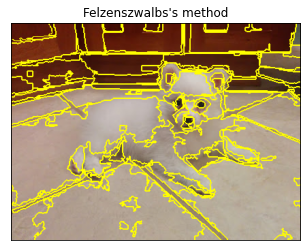

In [24]:
# Load image from images
rocki = io.imread('images/dog.jpg')
rocki = img_as_float(rocki)

segments_fz = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)
plt.imshow(mark_boundaries(rocki, segments_fz)) 
plt.title("Felzenszwalbs's method")
plt.xticks([])
plt.yticks([])
plt.show()

b) Test and explore different parameters in order to obtain a good image segmentation up to you. 
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values according to your subjective perception?
- How does each parameter behave?

Note: You can reduce the size of the image in order to accelerate the running. Does the image reduction affect the optimal values? 


Felzenszwalb number of segments: 157
Felzenszwalb number of segments: 34
Felzenszwalb number of segments: 54
Felzenszwalb number of segments: 37


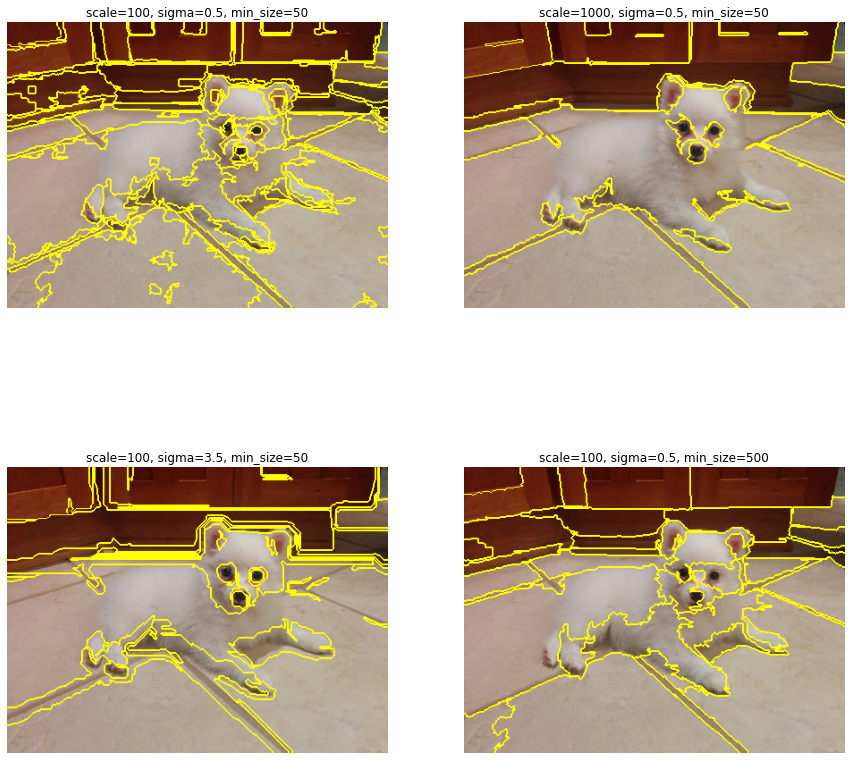

In [28]:
segments_fz_0 = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_0))}")

segments_fz_1 = felzenszwalb(rocki, scale=1000, sigma=0.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_1))}")

segments_fz_2 = felzenszwalb(rocki, scale=100, sigma=3.5, min_size=50)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_2))}")

segments_fz_3 = felzenszwalb(rocki, scale=100, sigma=0.5, min_size=500)
print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz_3))}")

images = [mark_boundaries(rocki, segments_fz_0),mark_boundaries(rocki, segments_fz_1),
          mark_boundaries(rocki, segments_fz_2), mark_boundaries(rocki, segments_fz_3)]
titles = ['scale=100, sigma=0.5, min_size=50','scale=1000, sigma=0.5, min_size=50',
          'scale=100, sigma=3.5, min_size=50','scale=100, sigma=0.5, min_size=500']
plot_images(images,titles,2,False)

- Is it critical to convert the image in grayscale in order to do the image segmentation?
>> Yesvdfv
- Is it critical to convert the image in float in order to do the image segmentation?
>> fw
- Which are the optimal values according to your subjective perception?
>> fwefd
- How does each parameter behave?
>> wefwe

c) Comment the definition of the algorithm (use approximately 3 lines at most), its advantages and disadvantages.

>> advantages:
disadvantages:


### SLIC - K-Means based image segmentation
d) Segment the same image using the SLIC image segmentation algorithm using the parameters by default. 

In [33]:
'''
mirar ppor tornos similares 
'''

'\nmirar ppor tornos similares \n'

SLIC number of segments: 93


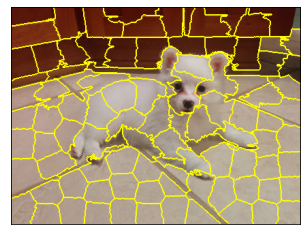

In [34]:
segments_slic = slic(rocki, start_label=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.imshow(mark_boundaries(rocki, segments_slic))
plt.xticks([])
plt.yticks([])
plt.show()

e) Explore what are the parameters of the slic function. Test different values for these parameters in order to obtain a good image segmentation with SLIC algorithm.
Answer the following qüestions:
- Is it critical to convert the image in grayscale in order to do the image segmentation?
- Is it critical to convert the image in float in order to do the image segmentation?
- Which are the optimal values of the optional valriables?
- How does each parameter behave?

SLIC number of segments: 97
SLIC number of segments: 462
SLIC number of segments: 105
SLIC number of segments: 102


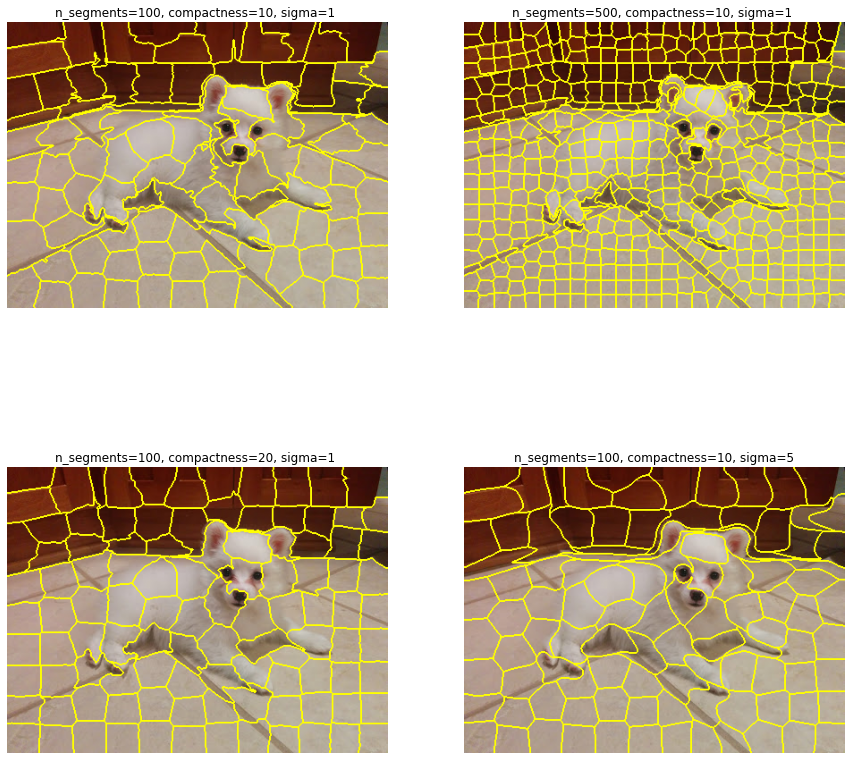

In [32]:
segments_slic_0 = slic(rocki, n_segments=100, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_0))}")

segments_slic_1 = slic(rocki, n_segments=500, compactness=10, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_1))}")

segments_slic_2 = slic(rocki, n_segments=100, compactness=20, sigma=1, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_2))}")

segments_slic_3 = slic(rocki, n_segments=100, compactness=10, sigma=5, start_label=1)
print(f"SLIC number of segments: {len(np.unique(segments_slic_3))}")

images = [mark_boundaries(rocki, segments_slic_0),mark_boundaries(rocki, segments_slic_1),
         mark_boundaries(rocki, segments_slic_2),mark_boundaries(rocki, segments_slic_3)]
titles = ['n_segments=100, compactness=10, sigma=1 ','n_segments=500, compactness=10, sigma=1 ',
          'n_segments=100, compactness=20, sigma=1 ','n_segments=100, compactness=10, sigma=5']
plot_images(images,titles,2,False)

- Is it critical to convert the image in grayscale in order to do the image segmentation?
>> Yesvdfv
- Is it critical to convert the image in float in order to do the image segmentation?
>> fw
- Which are the optimal values of the optional valriables?
>> fwefd
- How does each parameter behave?
>> wefwe

f) Comment what the algorithm is (in up to 3 lines).

>> Your solution here

### Quickshift image segmentation

g) Segment the same image using the Quickshift algorithm. 

Quickshift number of segments: 145


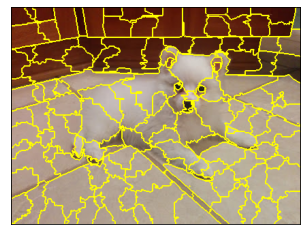

In [30]:
segments_quick = quickshift(rocki)

print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")

plt.imshow(mark_boundaries(rocki, segments_quick))
plt.xticks([])
plt.yticks([])
plt.show()

h) Test different parameters in order to obtain a good image segmentation with Quickshift algorithm.
Answer the following qüestions:
- Which are the optimal values?
- How does each parameter behave?

Quickshift number of segments: 52
Quickshift number of segments: 43
Quickshift number of segments: 46
Quickshift number of segments: 33


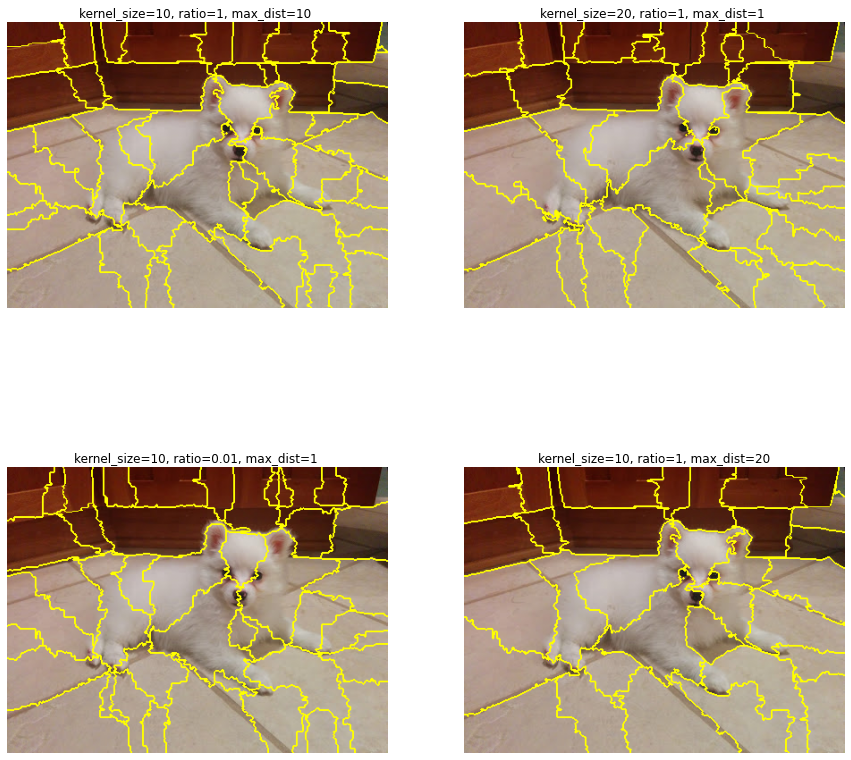

In [31]:
segments_quick_0 = quickshift(rocki, kernel_size=10, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_0))}")

segments_quick_1 = quickshift(rocki, kernel_size=15, ratio=1, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_1))}")

segments_quick_2 = quickshift(rocki, kernel_size=10, ratio=0.01, max_dist=10)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_2))}")

segments_quick_3 = quickshift(rocki, kernel_size=10, ratio=1, max_dist=20)
print(f"Quickshift number of segments: {len(np.unique(segments_quick_3))}")

images = [mark_boundaries(rocki, segments_quick_0),mark_boundaries(rocki, segments_quick_1),
         mark_boundaries(rocki, segments_quick_2),mark_boundaries(rocki, segments_quick_3)]
titles = ['kernel_size=10, ratio=1, max_dist=10 ','kernel_size=20, ratio=1, max_dist=1 ',
          'kernel_size=10, ratio=0.01, max_dist=1 ','kernel_size=10, ratio=1, max_dist=20']
plot_images(images,titles,2,False)


- Which are the optimal values?
>> fwefd
- How does each parameter behave?
>> wefwe

i) Comment what the algorithm is (in up to 3 lines).

>> Your solution here

### Comparison of segmentation algorithms
j) Plot the original image and the results of both algorithms in a 1x3 subplot using the optimal values.

In [28]:
# Your solution here

k) Calculate also the number of segments obtained on the image by each of the algorithms. Can the number of segments can be used as a criterion for the performance of the algorithms?

In [29]:
# Your solution here

l) Comment the differences between each method as well as their advantages and disadvantages.

>> Your solution here

m) Choose another couple of color and grayscale images from the folder 'images' as well as from internet and apply the three segmentation methods. Comment the results.

>>The results...